<a href="https://colab.research.google.com/github/yovictoraugusto/MLPRegressor/blob/main/MLPRegressor_VICTORAUGUSTOREISMARQUES_156620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/IA 1-2024/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
alldata = [data_train, data_test]

In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
data_train.columns.values.shape

(12,)

In [ ]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data_train['Embarked'].isna().sum()

2

In [ ]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
data_train['Embarked'].isna().sum()

0

In [ ]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [ ]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [ ]:
data_test.insert(loc=0, column='Survived', value=data_gender['Survived'].values)



In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34.5,0,0,2
1,1,3,1,47.0,1,0,0
2,0,2,0,62.0,0,0,2
3,0,3,0,27.0,0,0,0
4,1,3,1,22.0,1,1,0


In [ ]:
data_test.shape

(418, 7)

In [ ]:
data_train['Age'].isna().sum()

177

In [ ]:
np.random.seed(0)

In [ ]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_train.at[line,'Age']=rand_age
      #print("Depois",line,data_train.iloc[line]["Age"])


In [ ]:
data_train["Age"].isnull().sum()

0

In [ ]:
data_test["Age"].isnull().sum()

86

In [ ]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_test.at[line,'Age']=rand_age
      #print("Depois",line,data_test.iloc[line]["Age"])

In [ ]:
data_test["Age"].isnull().sum()

0

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [ ]:
X = data_train.drop(['Age'], axis=1).values
Y = data_train['Age'].values

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

In [ ]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


In [ ]:
#X_test = data_test.values
#Y_pred = clf.predict(X_test)

In [ ]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [ ]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0, 22,  1,  0,  0],
       [ 1,  1, 38,  1,  0,  1],
       [ 3,  1, 26,  0,  0,  0],
       ...,
       [ 3,  1, 34,  1,  2,  0],
       [ 1,  0, 26,  0,  0,  1],
       [ 3,  0, 32,  0,  0,  2]])

In [ ]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [ ]:
data_gender.shape

(418, 2)

In [ ]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
data_test['Survived'] = data_gender['Survived']

In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34,0,0,2
1,1,3,1,47,1,0,0
2,0,2,0,62,0,0,2
3,0,3,0,27,0,0,0
4,1,3,1,22,1,1,0


In [ ]:
data_test.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Pclass,-0.108615,1.000000,-0.108615,-0.430290,0.001087,0.018721,0.031096
Sex,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Age,-0.003778,-0.430290,-0.003778,1.000000,-0.067480,-0.050601,0.057969
SibSp,0.099943,0.001087,0.099943,-0.067480,1.000000,0.306895,-0.100603
Parch,0.159120,0.018721,0.159120,-0.050601,0.306895,1.000000,-0.125164
Embarked,0.126779,0.031096,0.126779,0.057969,-0.100603,-0.125164,1.000000


In [ ]:
# 1- juntar todos os dados em apenas uma planilha;
# 2- separar os dados em k-folds, onde k=5;
# 3- realizar tarefa de regressão de AGE utilizando modelos lineares;
# 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
# 6- Repetir mesmos passos 1--5 para o algoritmo de árvores de decisão;

In [ ]:
# 1- Juntar todos os dados em apenas uma planilha;
full_data = pd.concat([data_train, data_test])
full_data.shape

(1309, 7)

In [ ]:
nulos = np.where(full_data['Age'].values==0)
print(nulos)
full_data.values[nulos,3] = 1

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
       1245]),)


In [ ]:
np.where(full_data['Age'].values==0)

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
        1245]),)

In [ ]:
# 2- separar os dados em k-folds, onde k=5;
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0,shuffle=True)

In [ ]:
# 3- realizar tarefa de regressão de AGE utilizando modelos lineares;
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

reg = linear_model.Lasso(alpha=0.1)

mse_values = []
mae_values = []
mape_values = []

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

  Y_train = full_data.values[train_index][:,3]
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3, 1)

  Y_test = full_data.values[test_index][:,3]
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3, 1)

  reg.fit(X_train,Y_train)
  Y_pred = reg.predict(X_test)

  # 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
  mse = mean_squared_error(Y_test,Y_pred)
  mae = mean_absolute_error(Y_test,Y_pred)
  mape = mean_absolute_percentage_error(Y_test,Y_pred)

  mse_values.append(mse)
  mae_values.append(mae)
  mape_values.append(mape)

Fold 0:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   0    2    3 ... 1304 1306 1307]
  Test:  index=[   1    5    8    9   14   18   27   31   34   39   45   47   49   52
   55   58   61   75   80   85   92  108  124  140  141  142  152  156
  159  161  184  186  192  194  198  202  204  211  215  224  227  231
  233  240  241  247  251  254  268  270  276  283  295  298  299  302
  303  310  312  317  319  320  328  330  342  349  358  359  361  381
  386  390  393  397  406  408  412  416  418  420  422  425  426  427
  434  435  436  438  442  443  445  446  453  458  459  461  466  472
  474  477  478  482  483  486  491  503  505  506  511  512  513  523
  528  531  533  535  539  541  549  554  557  569  571  589  597  601
  608  609  610  618  625  632  638  641  642  649  651  656  658  669
  678  693  695  717  725  733  743  753  759  760  762  768  769  772
  773  785  790  792  793  794  795  796  798  813  814  817  833  839
  846  853  857  858  874  875  87

In [ ]:
# from sklearn import linear_model
# reg = linear_model.Lasso(alpha=0.1)
# reg.fit(X_train,Y_train)
# Y_pred = reg.predict(X_test)

In [ ]:
reg.coef_

array([-2.87599458, -6.09185843,  0.11514483, -1.66966778, -0.60584376,
        0.10672118])

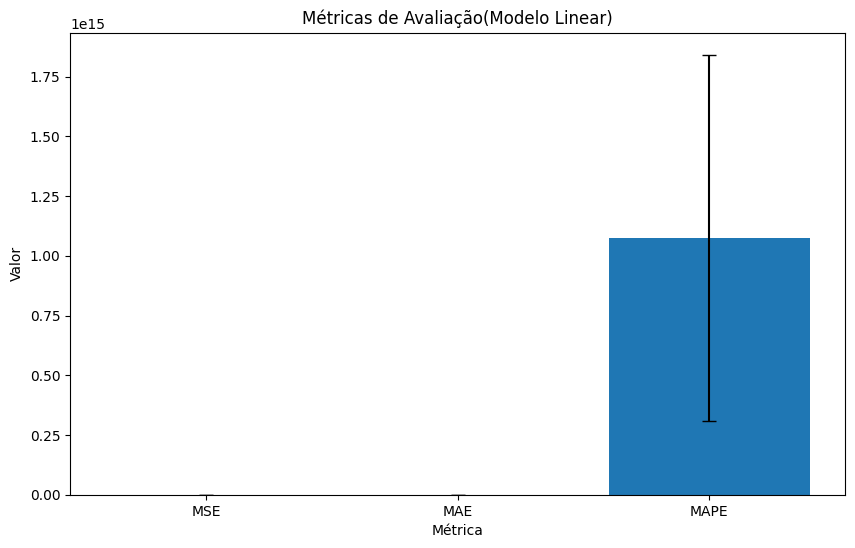

In [ ]:
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
import matplotlib.pyplot as plot

mse_mean = np.mean(mse_values)
mse_std = np.std(mse_values)

mae_mean = np.mean(mae_values)
mae_std = np.std(mae_values)

mape_mean = np.mean(mape_values)
mape_std = np.std(mape_values)

metrics = ['MSE', 'MAE', 'MAPE']
means = [mse_mean, mae_mean, mape_mean]
stds = [mse_std, mae_std, mape_std]

# print("MSE: %f" % mse_mean)
# print("MAE: %f" %mae_mean)
# print("MAPE: %f" %mape_mean)

plot.figure(figsize=(10, 6))
plot.bar(metrics, means, yerr=stds, capsize=5)
plot.title('Métricas de Avaliação(Modelo Linear)')
plot.xlabel('Métrica')
plot.ylabel('Valor')
plot.show()

In [ ]:
# 6- Repetir mesmos passos 1--5 para o algoritmo de árvores de decisão;

# 1- Juntar todos os dados em apenas uma planilha;
full_data = pd.concat([data_train, data_test])
full_data.shape

(1309, 7)

In [ ]:
nulos = np.where(full_data['Age'].values==0)
print(nulos)
full_data.values[nulos,3] = 1

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
       1245]),)


In [ ]:
np.where(full_data['Age'].values==0)

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
        1245]),)

In [ ]:
# 2- separar os dados em k-folds, onde k=5;
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0,shuffle=True)

In [ ]:
# 3- realizar tarefa de regressão de AGE utilizando árvore de decisão;
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

clf = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_split=10,
                            criterion='squared_error')

mse_values_tree = []
mae_values_tree = []
mape_values_tree = []

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

  Y_train = full_data.values[train_index][:,3]
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3, 1)

  Y_test = full_data.values[test_index][:,3]
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3, 1)

  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)

  # 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
  mse_tree = mean_squared_error(Y_test,Y_pred)
  mae_tree = mean_absolute_error(Y_test,Y_pred)
  mape_tree = mean_absolute_percentage_error(Y_test,Y_pred)

  mse_values_tree.append(mse_tree)
  mae_values_tree.append(mae_tree)
  mape_values_tree.append(mape_tree)

Fold 0:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   0    2    3 ... 1304 1306 1307]
  Test:  index=[   1    5    8    9   14   18   27   31   34   39   45   47   49   52
   55   58   61   75   80   85   92  108  124  140  141  142  152  156
  159  161  184  186  192  194  198  202  204  211  215  224  227  231
  233  240  241  247  251  254  268  270  276  283  295  298  299  302
  303  310  312  317  319  320  328  330  342  349  358  359  361  381
  386  390  393  397  406  408  412  416  418  420  422  425  426  427
  434  435  436  438  442  443  445  446  453  458  459  461  466  472
  474  477  478  482  483  486  491  503  505  506  511  512  513  523
  528  531  533  535  539  541  549  554  557  569  571  589  597  601
  608  609  610  618  625  632  638  641  642  649  651  656  658  669
  678  693  695  717  725  733  743  753  759  760  762  768  769  772
  773  785  790  792  793  794  795  796  798  813  814  817  833  839
  846  853  857  858  874  875  87

In [ ]:
# 3- realizar tarefa de regressão de AGE utilizando MLPRegressor;
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

regr = MLPRegressor(random_state=0, hidden_layer_sizes=(1000,));

mse_values_MLP = []
mae_values_MLP = []
mape_values_MLP = []

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

  Y_train = full_data.values[train_index][:,3]
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3, 1)

  Y_test = full_data.values[test_index][:,3]
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3, 1)

  regr.fit(X_train,Y_train)
  Y_pred = regr.predict(X_test)

  # 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
  mse_MLP = mean_squared_error(Y_test,Y_pred)
  mae_MLP = mean_absolute_error(Y_test,Y_pred)
  mape_MLP = mean_absolute_percentage_error(Y_test,Y_pred)

  mse_values_MLP.append(mse_MLP)
  mae_values_MLP.append(mae_MLP)
  mape_values_MLP.append(mape_MLP)

Fold 0:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   0    2    3 ... 1304 1306 1307]
  Test:  index=[   1    5    8    9   14   18   27   31   34   39   45   47   49   52
   55   58   61   75   80   85   92  108  124  140  141  142  152  156
  159  161  184  186  192  194  198  202  204  211  215  224  227  231
  233  240  241  247  251  254  268  270  276  283  295  298  299  302
  303  310  312  317  319  320  328  330  342  349  358  359  361  381
  386  390  393  397  406  408  412  416  418  420  422  425  426  427
  434  435  436  438  442  443  445  446  453  458  459  461  466  472
  474  477  478  482  483  486  491  503  505  506  511  512  513  523
  528  531  533  535  539  541  549  554  557  569  571  589  597  601
  608  609  610  618  625  632  638  641  642  649  651  656  658  669
  678  693  695  717  725  733  743  753  759  760  762  768  769  772
  773  785  790  792  793  794  795  796  798  813  814  817  833  839
  846  853  857  858  874  875  87

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   0    1    3 ... 1305 1307 1308]
  Test:  index=[   2   10   15   16   19   30   40   44   54   60   64   65   70   77
   79   81   82   88   97  101  103  110  113  117  122  131  165  175
  182  183  187  188  190  191  195  196  200  206  214  230  239  249
  252  253  255  260  261  263  264  267  269  271  272  278  279  294
  308  311  315  316  322  333  338  351  356  362  363  364  366  367
  384  395  399  402  405  431  432  440  452  464  465  467  471  479
  481  487  489  494  495  500  501  517  520  526  529  530  536  540
  548  553  565  567  568  574  575  579  580  581  587  588  590  592
  613  615  619  629  644  646  655  657  668  672  674  682  686  687
  688  692  703  708  716  722  724  726  731  740  742  747  748  754
  761  764  775  780  783  784  787  789  799  805  808  811  815  818
  822  824  828  840  862  863  877  883  891  892  893  895  900  901
  905  914  921  922  923  930  93

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   0    1    2 ... 1305 1306 1308]
  Test:  index=[   6   12   17   20   21   35   37   38   42   46   48   50   62   66
   68   71   76   78   83   90   95  100  105  109  114  116  118  119
  120  125  127  133  138  143  144  145  150  154  155  157  158  162
  167  170  171  172  177  178  179  181  193  208  210  217  220  222
  229  235  236  238  242  243  250  258  262  266  285  288  289  293
  301  304  306  309  313  318  321  325  331  332  334  337  344  345
  346  350  352  372  378  379  380  382  385  389  391  396  403  409
  410  413  415  421  424  439  447  451  456  457  462  484  485  492
  493  496  507  515  521  522  524  527  545  546  552  561  564  576
  578  582  583  593  596  604  605  614  616  621  622  624  626  627
  630  634  652  654  660  661  662  664  665  667  671  677  681  689
  699  700  704  709  711  712  713  723  728  729  737  741  744  746
  751  752  757  758  766  771  80

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3:
  Train Size=(1047,)
  Test Size=(262,)
  Train: index=[   1    2    5 ... 1306 1307 1308]
  Test:  index=[   0    3    4    7   13   22   26   29   51   53   56   59   63   74
   89   96  102  104  107  112  126  132  134  135  137  147  148  153
  160  163  173  185  205  213  218  219  223  225  226  228  237  245
  246  248  259  265  280  281  282  284  292  300  305  326  327  336
  339  343  347  348  353  354  355  357  360  365  369  371  374  375
  376  392  394  400  401  404  407  411  414  417  419  428  437  441
  449  454  455  460  463  468  470  473  475  476  490  497  499  502
  504  516  518  519  532  534  538  542  550  558  563  566  570  572
  573  577  584  585  586  595  602  603  612  620  631  635  636  640
  643  647  648  650  653  666  670  676  679  680  683  685  690  691
  694  698  702  706  707  715  718  720  721  732  736  738  745  776
  781  786  788  800  810  819  820  823  825  826  827  832  836  837
  838  841  842  844  847  851  85

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4:
  Train Size=(1048,)
  Test Size=(261,)
  Train: index=[   0    1    2 ... 1306 1307 1308]
  Test:  index=[  11   23   24   25   28   32   33   36   41   43   57   67   69   72
   73   84   86   87   91   93   94   98   99  106  111  115  121  123
  128  129  130  136  139  146  149  151  164  166  168  169  174  176
  180  189  197  199  201  203  207  209  212  216  221  232  234  244
  256  257  273  274  275  277  286  287  290  291  296  297  307  314
  323  324  329  335  340  341  368  370  373  377  383  387  388  398
  423  429  430  433  444  448  450  469  480  488  498  508  509  510
  514  525  537  543  544  547  551  555  556  559  560  562  591  594
  598  599  600  606  607  611  617  623  628  633  637  639  645  659
  663  673  675  684  696  697  701  705  710  714  719  727  730  734
  735  739  749  750  755  756  763  765  767  770  774  777  778  779
  782  791  797  802  803  804  806  807  809  812  816  821  835  843
  845  849  850  859  860  865  86

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


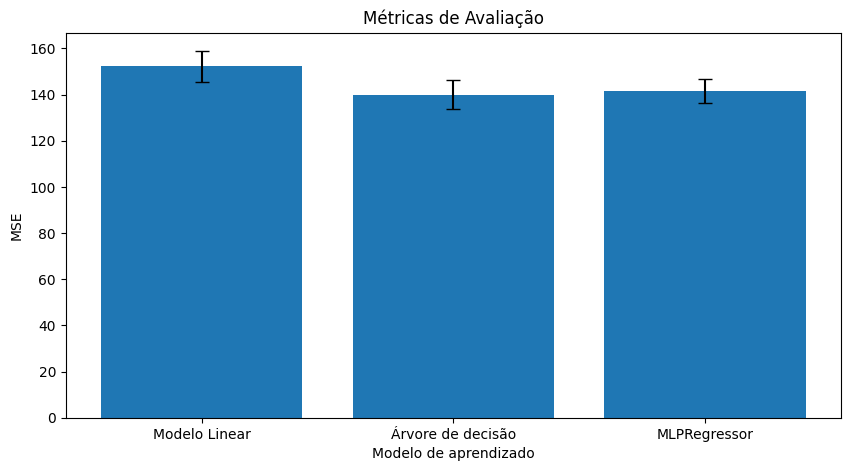

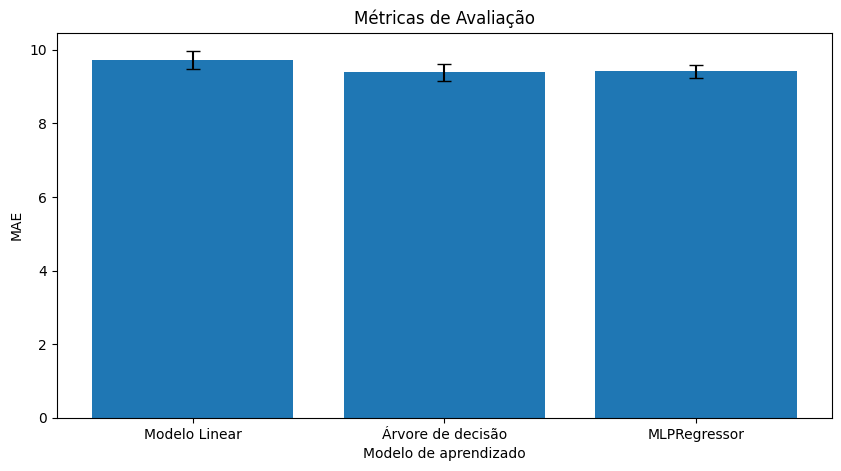

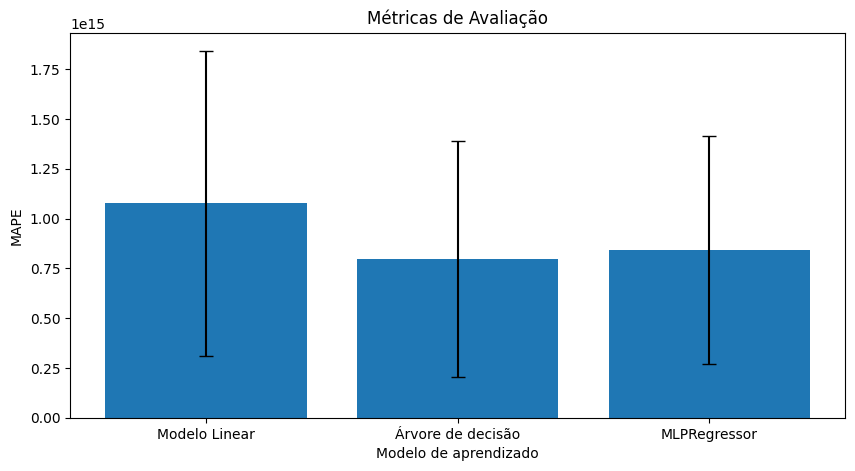

MSE: 152.276911
MAPE: 1076025891870569.375000
MAE: 9.723921

MSE TREE: 139.947022
MAPE TREE: 797784892429344.375000
MAE TREE: 9.389170

MSE MLPRegressor: 141.534373
MAPE MLPRegressor: 841674543949819.250000
MAE MLPRegressor: 9.418626


In [ ]:
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
import matplotlib.pyplot as plot

mse_mean = np.mean(mse_values)
mse_std = np.std(mse_values)
mse_mean_tree = np.mean(mse_values_tree)
mse_std_tree = np.std(mse_values_tree)
mse_mean_MLP = np.mean(mse_values_MLP)
mse_std_MLP = np.std(mse_values_MLP)

mae_mean = np.mean(mae_values)
mae_std = np.std(mae_values)
mae_mean_tree = np.mean(mae_values_tree)
mae_std_tree = np.std(mae_values_tree)
mae_mean_MLP = np.mean(mae_values_MLP)
mae_std_MLP = np.std(mae_values_MLP)

mape_mean = np.mean(mape_values)
mape_std = np.std(mape_values)
mape_mean_tree = np.mean(mape_values_tree)
mape_std_tree = np.std(mape_values_tree)
mape_mean_MLP = np.mean(mape_values_MLP)
mape_std_MLP = np.std(mape_values_MLP)

metrics_mse = ['Modelo Linear', 'Árvore de decisão', 'MLPRegressor']
means_mse = [mse_mean, mse_mean_tree, mse_mean_MLP]
stds_mse = [mse_std, mse_std_tree, mse_std_MLP]

plot.figure(figsize=(10, 5))
plot.bar(metrics_mse, means_mse, yerr=stds_mse, capsize=5)
plot.title('Métricas de Avaliação')
plot.xlabel('Modelo de aprendizado')
plot.ylabel('MSE')
plot.show()

metrics_mae = ['Modelo Linear', 'Árvore de decisão', 'MLPRegressor']
means_mae = [mae_mean, mae_mean_tree, mae_mean_MLP]
stds_mae = [mae_std, mae_std_tree, mae_std_MLP]

plot.figure(figsize=(10, 5))
plot.bar(metrics_mae, means_mae, yerr=stds_mae, capsize=5)
plot.title('Métricas de Avaliação')
plot.xlabel('Modelo de aprendizado')
plot.ylabel('MAE')
plot.show()

metrics_mape = ['Modelo Linear', 'Árvore de decisão', 'MLPRegressor']
means_mape = [mape_mean, mape_mean_tree, mape_mean_MLP]
stds_mape = [mape_std, mape_std_tree, mape_std_MLP]

plot.figure(figsize=(10, 5))
plot.bar(metrics_mape, means_mape, yerr=stds_mape, capsize=5)
plot.title('Métricas de Avaliação')
plot.xlabel('Modelo de aprendizado')
plot.ylabel('MAPE')
plot.show()

print("MSE: %f" % mse_mean)
print("MAPE: %f" %mape_mean)
print("MAE: %f" %mae_mean)

print()

print("MSE TREE: %f" % mse_mean_tree)
print("MAPE TREE: %f" %mape_mean_tree)
print("MAE TREE: %f" %mae_mean_tree)

print()

print("MSE MLPRegressor: %f" % mse_mean_MLP)
print("MAPE MLPRegressor: %f" %mape_mean_MLP)
print("MAE MLPRegressor: %f" %mae_mean_MLP)

MSE TREE: 139.947022
MAPE TREE: 797784892429344.375000
MAE TREE: 9.389170

MSE MLPRegressor: 152.276911
MAPE MLPRegressor: 1076025891870569.375000
MAE MLPRegressor: 9.723921